#Data Pre-Processing

##Declare global variables

##Read in Data from file "PPR-ALL.csv"

In [382]:
#Static variables
#Got rid of json file as does not contain data i needed
FOLDER = "..\RawDatasets"
FOLDER_PRO = "..\ProcessedDatasets"
fn1 = "\QIEN628BIS(1).csv"
fn2 = "\PPR-ALL.csv"
fn3 = "\pro_dataset.csv"
fn4 = "\FY001.20231025T171056.csv"
fp1 = FOLDER + fn1
fp2 = FOLDER + fn2
fp3 = FOLDER_PRO + fn3

##Imports
###List of imports: pandas, numpy ,os, matplotlib

In [299]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Users\\SKy\\GitRepos\\Project1-HousePricePrediction\\DataPreprocessing'

##Read in Data from file "PPR-ALL.csv" into Pandas DataFrame encoding="ANSI"

In [300]:
df = pd.read_csv(fp2, encoding='ANSI',engine='python',dtype={'Address': str})


##Exploring the data

In [301]:
#Head of the data first 5 rows
df.head()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"€343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"€438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"€400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"€160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [302]:
#Tail of the data last 5 rows
df.tail()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
624072,06/10/2023,"ROSE COTTAGE, KNOCKAUNARAST, BALLYSAGGART",Waterford,P51A091,"€325,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
624073,06/10/2023,"SAUNDERS COURT, MULLINGAR, WESTMEATH",Westmeath,NaN,"€250,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
624074,06/10/2023,"THE GREEN, FETHARD, CO TIPPERARY",Tipperary,NaN,"€66,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
624075,06/10/2023,"THREE CASTLES, MANOR KILBRIDE, BLESSINGTON",Wicklow,W91E2V8,"€370,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
624076,06/10/2023,"TUREEN, WALSH ISLAND, TULLAMORE",Offaly,R35YX39,"€325,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [303]:
#Basic Info on Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624077 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  624077 non-null  object
 1   Address                    624077 non-null  object
 2   County                     624077 non-null  object
 3   Eircode                    112792 non-null  object
 4   Price (€)                  624077 non-null  object
 5   Not Full Market Price      624077 non-null  object
 6   VAT Exclusive              624077 non-null  object
 7   Description of Property    624077 non-null  object
 8   Property Size Description  52819 non-null   object
dtypes: object(9)
memory usage: 42.9+ MB


In [304]:
#Gives count of, unique values, top, and freq
df.describe()

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
count,624077,624077,624077,112792,624077,624077,624077,624077,52819
unique,4756,564932,26,110330,36217,2,2,5,6
top,22/12/2014,"Broomfield, Midleton",Dublin,A96WV79,"€150,000.00",No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
freq,1542,21,196273,8,7712,593703,522782,520788,38089


##Read in Data from file "PPR-ALL.csv" into Pandas DataFrame encoding="ANSI"

In [305]:
##df2 = pd.read_json(fp1)

##Explore data

In [306]:
##df2.head()

In [307]:
##df2.tail()

In [308]:
##df2.info()

In [309]:
##df2.describe()

In [310]:
#Explore the structure of the Valuation Report
##df2.loc[0,"ValuationReport"]

In [311]:
#Explore the structure of the Valuation Report
##df2.loc[4,"ValuationReport"]

In [312]:
#Explore breakdown of Residential/Commerical
#There are no residential listing in dataset despite it having that as a Category
##df2["Category"].unique()

##Data Cleaning

In [313]:
#Check for null rows - Result : 0
null_rows = df[df.isnull().all(axis=1)]
null_rows.count()
#Drop any null rows
df = df.drop(null_rows.index)

In [314]:
#Get count of number rows have 'Not Full Market Price' set to "Yes"
yes_count = (df['Not Full Market Price'] == "Yes").sum()
yes_count

30374

In [315]:
#Get new filtered list with only the Yes values
filtered_df = df[df['Not Full Market Price'] != "No"]

In [316]:
filtered_df['Not Full Market Price'].unique()

array(['Yes'], dtype=object)

In [317]:
#Get index of rows to delete
rows_to_delete = filtered_df.index
rows_to_delete

Index([    41,     48,     69,     89,    101,    116,    123,    129,    144,
          153,
       ...
       623898, 623908, 623966, 623969, 623975, 623976, 624002, 624028, 624034,
       624074],
      dtype='int64', length=30374)

In [318]:
#Use drop method to actually delete
df = df.drop(rows_to_delete)

In [319]:
df['Not Full Market Price'].unique()

array(['No'], dtype=object)

In [320]:
#Check number of properties marked as VAT Exclusive
df[df['VAT Exclusive']=='Yes'].count()

Date of Sale (dd/mm/yyyy)    96506
Address                      96506
County                       96506
Eircode                       2185
Price (€)                    96506
Not Full Market Price        96506
VAT Exclusive                96506
Description of Property      96506
Property Size Description    50308
dtype: int64

In [321]:
#Display rows that have VAT Exclusive == 'Yes'
vat_exclusive = df[df['VAT Exclusive']=='Yes']
vat_exclusive

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
14,04/01/2010,"25 Lavallin Drive, Whitechurch, Cork",Cork,NaN,"€352,000.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
20,04/01/2010,"48 KILLIANS COURT, MULLAGH",Cavan,NaN,"€122,000.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
21,04/01/2010,"49 ballynakelly green, newcastle",Dublin,NaN,"€499,600.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
28,04/01/2010,"Aughmagree, Kilteevan",Roscommon,NaN,"€215,000.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
...,...,...,...,...,...,...,...,...,...
624038,06/10/2023,"25 River Meadows, Cloughduv",Cork,NaN,"€299,559.00",No,Yes,New Dwelling house /Apartment,NaN
624047,06/10/2023,"37 Meadows Way, Crossneed, Co Laois",Laois,NaN,"€273,127.75",No,Yes,New Dwelling house /Apartment,NaN
624050,06/10/2023,"4 The Close, Vartry Wood, Ashford",Wicklow,NaN,"€466,960.00",No,Yes,New Dwelling house /Apartment,NaN
624055,06/10/2023,"58 Vatry Close, Tinakilly Park, Rathnew",Wicklow,NaN,"€442,477.00",No,Yes,New Dwelling house /Apartment,NaN


In [322]:
#Change data type to correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  593703 non-null  object
 1   Address                    593703 non-null  object
 2   County                     593703 non-null  object
 3   Eircode                    107741 non-null  object
 4   Price (€)                  593703 non-null  object
 5   Not Full Market Price      593703 non-null  object
 6   VAT Exclusive              593703 non-null  object
 7   Description of Property    593703 non-null  object
 8   Property Size Description  51345 non-null   object
dtypes: object(9)
memory usage: 45.3+ MB


In [323]:
#Change Date of Sale
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], format='%d/%m/%Y').dt.strftime('%Y/%m/%d')

In [324]:
#errors='coerce' handles any errors in parsing
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'], format='%Y/%m/%d', errors='coerce')


In [325]:
#Rename column
df = df.rename(columns={"Date of Sale (dd/mm/yyyy)":"Date of Sale"})

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price (€)                  593703 non-null  object        
 5   Not Full Market Price      593703 non-null  object        
 6   VAT Exclusive              593703 non-null  object        
 7   Description of Property    593703 non-null  object        
 8   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 45.3+ MB


In [327]:
#Change Address to str type
df['Address'] = df['Address'].str.strip()
#df['Address'] = df['Address'].astype(str) ##Didn't work for some reason???
df['Address'] = df['Address'].apply(str)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price (€)                  593703 non-null  object        
 5   Not Full Market Price      593703 non-null  object        
 6   VAT Exclusive              593703 non-null  object        
 7   Description of Property    593703 non-null  object        
 8   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 45.3+ MB


,Date of Sale,Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"€343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"€185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"€438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",Meath,NaN,"€400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"€160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [328]:
#Check address for weird values
for val in df['Address']:
    if(type(val) != str):
        print(type(val))


In [329]:
#Remove € from Price column
df['Price (€)'] = df['Price (€)'].str.replace('€', '', regex=False)

In [330]:
#Remove € from Price column
df = df.rename(columns={"Price (€)":"Price"})

In [331]:
#Remove commas
df['Price'] = df['Price'].str.replace(',', '', regex=False)

In [332]:
#Convert Price to float
df['Price'] = df['Price'].astype(float)
df.loc[df['VAT Exclusive'] == "Yes", 'Price']

1         185000.00
14        352000.00
20        122000.00
21        499600.00
28        215000.00
            ...    
624038    299559.00
624047    273127.75
624050    466960.00
624055    442477.00
624057    466960.00
Name: Price, Length: 96506, dtype: float64

In [333]:
# Check if "VAT Exclusive" is "Yes" and update the "Price" column by 13.5%
df.loc[df['VAT Exclusive'] == "Yes", 'Price'] += df.loc[df['VAT Exclusive'] == "Yes", 'Price'] * 0.135

In [334]:
df.loc[df['VAT Exclusive'] == "Yes", 'Price']

1         209975.00000
14        399520.00000
20        138470.00000
21        567046.00000
28        244025.00000
              ...     
624038    339999.46500
624047    309999.99625
624050    529999.60000
624055    502211.39500
624057    529999.60000
Name: Price, Length: 96506, dtype: float64

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price                      593703 non-null  float64       
 5   Not Full Market Price      593703 non-null  object        
 6   VAT Exclusive              593703 non-null  object        
 7   Description of Property    593703 non-null  object        
 8   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 45.3+ MB


In [336]:
#Ok now drop Not Full Market Price, VAT Exclusive Columns
df = df.drop(columns=['VAT Exclusive'])
df = df.drop(columns=['Not Full Market Price'])

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593703 entries, 0 to 624076
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date of Sale               593703 non-null  datetime64[ns]
 1   Address                    593703 non-null  object        
 2   County                     593703 non-null  object        
 3   Eircode                    107741 non-null  object        
 4   Price                      593703 non-null  float64       
 5   Description of Property    593703 non-null  object        
 6   Property Size Description  51345 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 36.2+ MB


#Analysis Description of Property and Property Size Description

In [338]:
#Get unique values
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe',
       'Teach/Árasán Cónaithe Nua', 'Teach/?ras?n C?naithe Nua'],
      dtype=object)

In [339]:
#Investigate  'Teach/?ras?n C?naithe Nua', 
weird_rows = df[df['Description of Property']=='Teach/?ras?n C?naithe Nua']
weird_rows

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
39806,2012-01-12,"Apartment 12 Block B, Corofin House Clare Vi...",Dublin,NaN,130576.075,Teach/?ras?n C?naithe Nua,n?os l? n? 38 m?adar cearnach


In [340]:
#Investigate  'Teach/Árasán Cónaithe Atháimhe', 
second_hand = df[df['Description of Property']=='Teach/Árasán Cónaithe Atháimhe']
second_hand

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
1145,2010-02-01,"247 GLANNTAN, GOLF LINKS ROAD, CASTLETROY.",Limerick,NaN,228500.00,Teach/Árasán Cónaithe Atháimhe,NaN
12754,2010-08-20,"8 Millhill Park, Skerries.",Dublin,NaN,320000.00,Teach/Árasán Cónaithe Atháimhe,NaN
17319,2010-11-02,"Carrigvore, Killiskey.",Wicklow,NaN,610000.00,Teach/Árasán Cónaithe Atháimhe,NaN
22673,2011-02-16,"Racecourse Road, Roscommon.",Roscommon,NaN,100000.00,Teach/Árasán Cónaithe Atháimhe,NaN
26813,2011-05-27,"12 Southdene, Gleann Bhaile Na Manach, Baile N...",Dublin,NaN,272000.00,Teach/Árasán Cónaithe Atháimhe,NaN
32224,2011-09-07,"Station road, Castlebellingham, Dundalk.",Louth,NaN,179000.00,Teach/Árasán Cónaithe Atháimhe,NaN
48902,2012-06-28,"7 Thorndale Grove, Artane, Dublin.",Dublin,NaN,250000.00,Teach/Árasán Cónaithe Atháimhe,NaN
54026,2012-09-10,"121 Ardilaun, Portmarnock, Co Dublin.",Dublin,NaN,375000.00,Teach/Árasán Cónaithe Atháimhe,NaN
59663,2012-11-22,"104 Shandon Park, Phibsborough, Dublin 7",Dublin,NaN,290000.00,Teach/Árasán Cónaithe Atháimhe,NaN
61743,2012-12-11,"58 Bunbury Gate Crescent, Swords, Co. Dublin",Dublin,NaN,325000.00,Teach/Árasán Cónaithe Atháimhe,NaN


In [341]:
#Investigate  'Teach/Árasán Cónaithe Atháimhe', 
second_hand = df[df['Description of Property']=='Teach/Árasán Cónaithe Nua']
second_hand

,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description
20133,2010-12-16,"7 Cul Na Toinne, Bunbeg.",Donegal,NaN,85000.00245,Teach/Árasán Cónaithe Nua,níos mó ná nó cothrom le 38 méadar cearnach ag...
127044,2014-10-31,"13 Seachnall Abbey, Dunshaughlin",Meath,NaN,419496.00000,Teach/Árasán Cónaithe Nua,níos mó ná nó cothrom le 38 méadar cearnach ag...
478541,2021-05-24,"19 TUAIRIN, COAST ROAD, ROSCAM",Galway,H91HC9W,358053.34250,Teach/Árasán Cónaithe Nua,NaN


In [342]:
#So replace Irish translations to English
df.loc[df['Description of Property'] == "Teach/Árasán Cónaithe Nua", 'Description of Property'] = "New Dwelling house /Apartment"
df.loc[df['Description of Property'] == "Teach/?ras?n C?naithe Nua", 'Description of Property'] = "New Dwelling house /Apartment"
df.loc[df['Description of Property'] == "Teach/Árasán Cónaithe Atháimhe", 'Description of Property'] = "Second-Hand Dwelling house /Apartment"

In [343]:
#Get unique values
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [344]:
#Get unique values for Property Size descriptions
df['Property Size Description'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than 125 sq metres', 'less than 38 sq metres',
       'greater than or equal to 125 sq metres',
       'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach',
       'n?os l? n? 38 m?adar cearnach'], dtype=object)

In [345]:
#Translate Irish to English
df.loc[df['Property Size Description'] == "níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach", 'Property Size Description'] = "greater than or equal to 38 sq metres and less than 125 sq metres"

In [346]:
#Drop junk row
df = df[df['Property Size Description'] != 'n?os l? n? 38 m?adar cearnach']

In [347]:
#Now check unique values
df['Property Size Description'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than 125 sq metres', 'less than 38 sq metres',
       'greater than or equal to 125 sq metres'], dtype=object)

In [348]:
#Confirm only new builds have Size Descriptions
#Get value counts for Property Descriptions
property_description_counts = df['Description of Property'].value_counts().reset_index()
property_description_counts.columns = ['Description of Property', 'Count']
property_description_counts

#new_builds = df[df['Description of Property']=='New Dwelling house /Apartment']

#count_with_size = df[new_builds & df['Property Size Description'].notnull()].count()
#count_without_size = df[new_builds & df['Property Size Description'].isnull()].count()

##print(count_with_size)
##print(count_without_size)


,Description of Property,Count
0,Second-Hand Dwelling house /Apartment,495568
1,New Dwelling house /Apartment,98134


In [349]:
#Try group together  - Only new builds have Property Size Descriptions
#Select only two columns
filtered_cols = df.loc[:,['Description of Property', "Property Size Description"]]
grouped_counts = df.groupby(['Description of Property', 'Property Size Description']).size().reset_index(name='Count')
grouped_counts
#grouped_counts.columns = ['Description of Property', "Property Size Description",'Count']
#grouped_counts

,Description of Property,Property Size Description,Count
0,New Dwelling house /Apartment,greater than 125 sq metres,6747
1,New Dwelling house /Apartment,greater than or equal to 125 sq metres,4531
2,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,36877
3,New Dwelling house /Apartment,less than 38 sq metres,3189


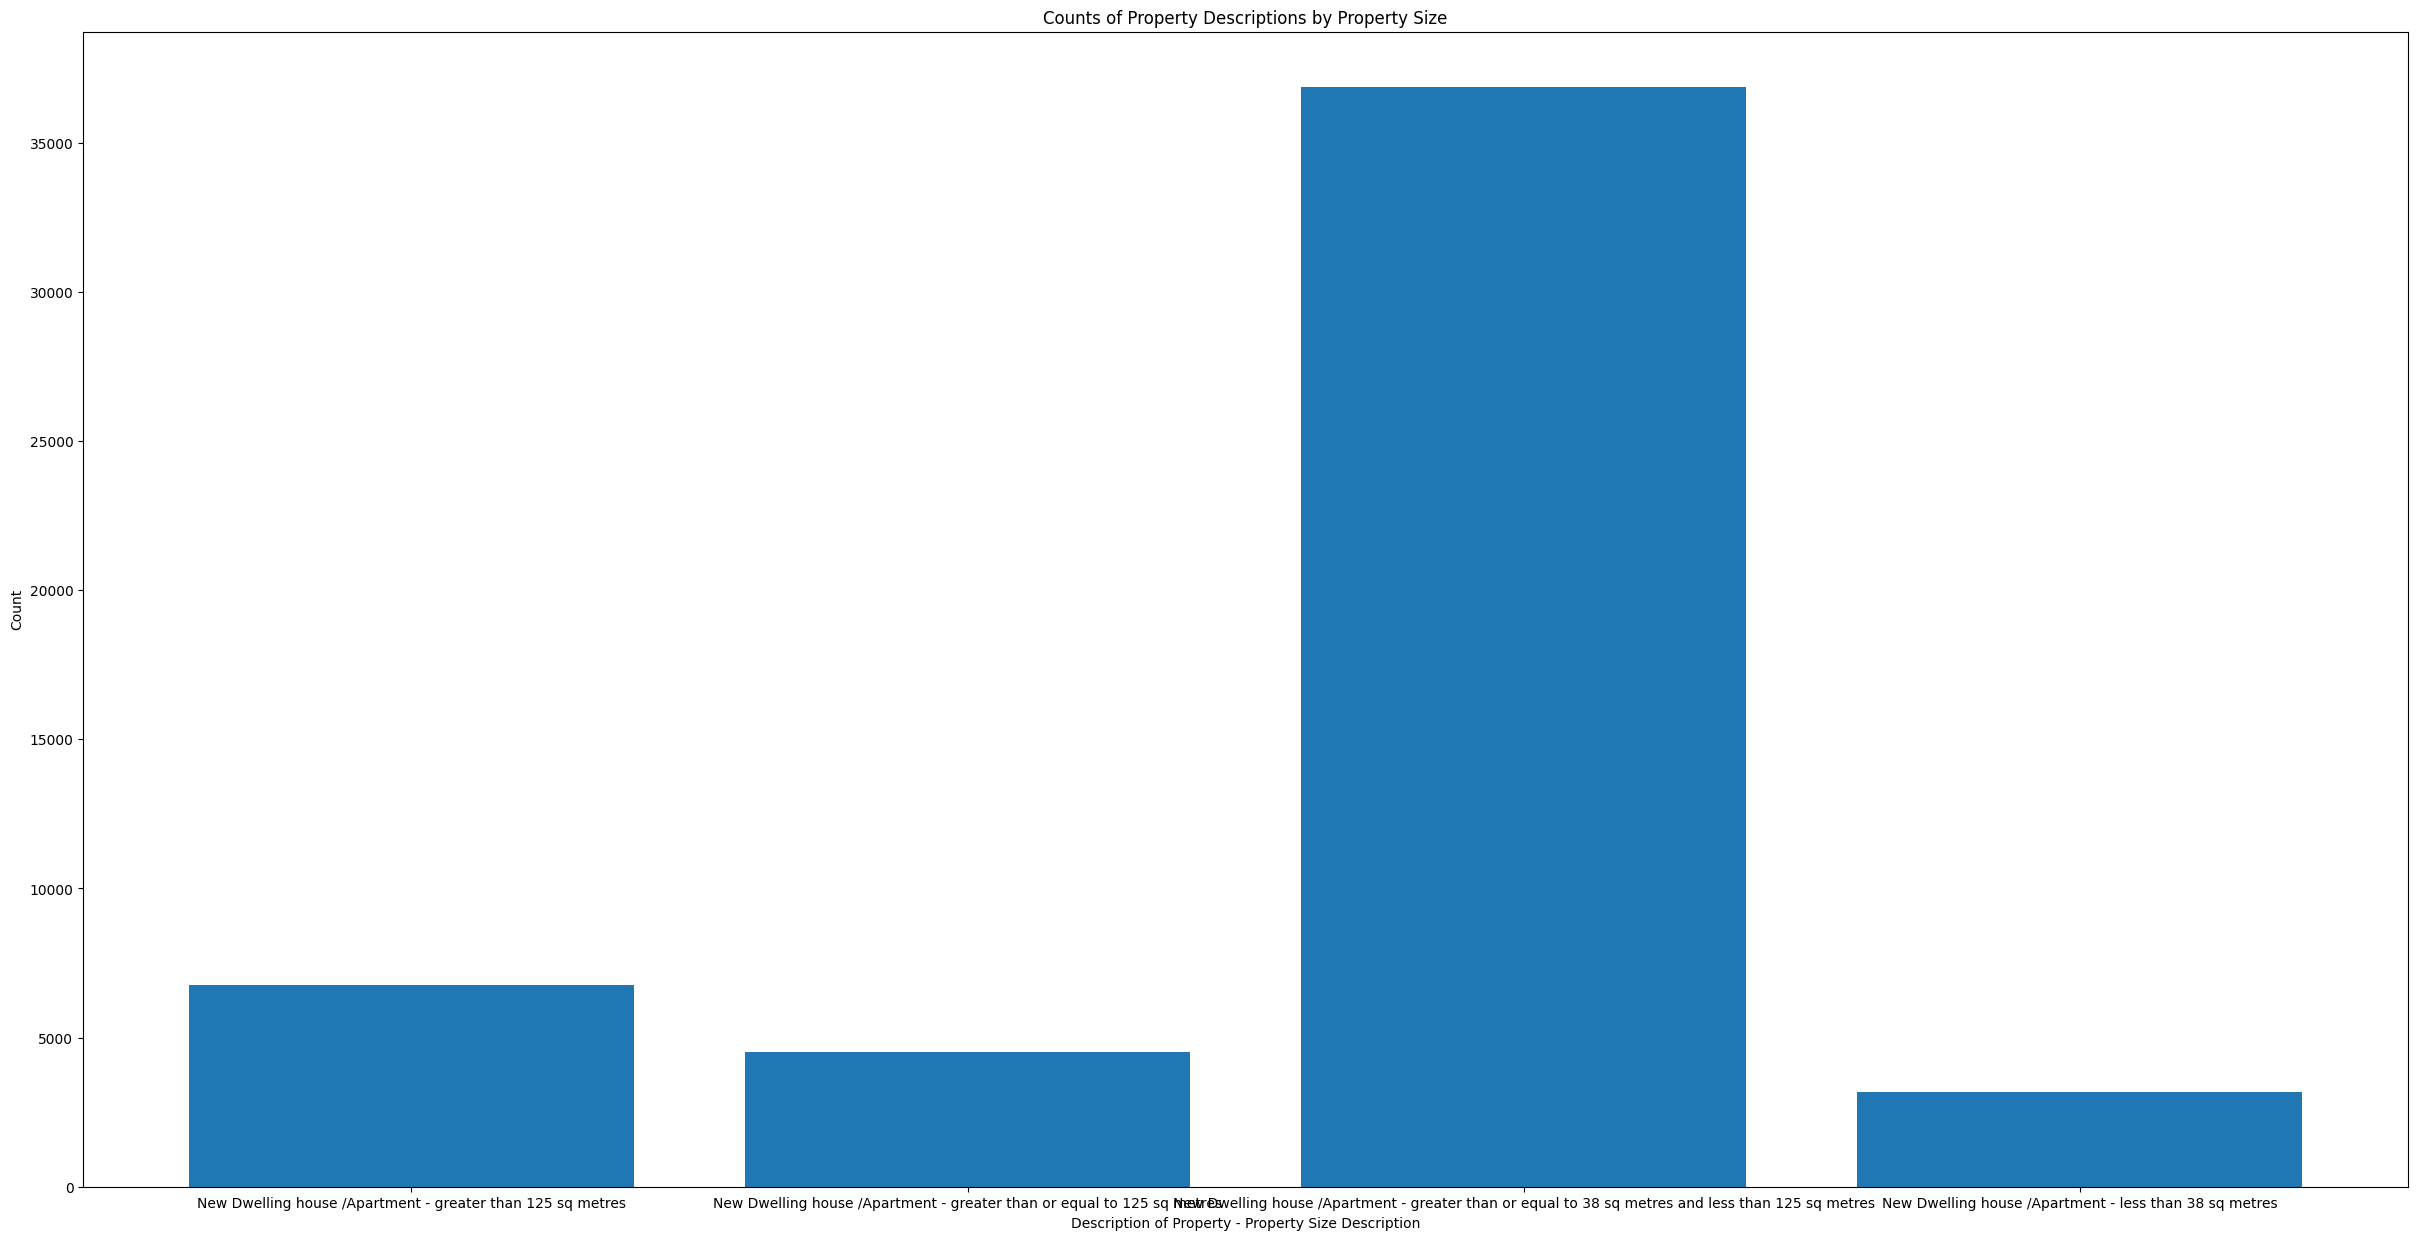

In [350]:
# Create a bar graph
plt.figure(figsize=(30, 15))
plt.bar(grouped_counts['Description of Property'] + ' - ' + grouped_counts['Property Size Description'], grouped_counts['Count'])
plt.xlabel('Description of Property - Property Size Description')
plt.ylabel('Count')
plt.title('Counts of Property Descriptions by Property Size')
plt.show()

In [351]:
#Output changes to csv
##df.to_csv(fp3)


In [352]:
#Split out only new builds
new_builds = df[df["Description of Property"] == "New Dwelling house /Apartment"]
new_builds.count()

Date of Sale                 98134
Address                      98134
County                       98134
Eircode                       2321
Price                        98134
Description of Property      98134
Property Size Description    51344
dtype: int64

In [353]:
#Split dates into four quarters
#Add a column year with datetime year from Date of Sale
new_builds['Year'] = new_builds['Date of Sale'].dt.year
new_builds.head()

C:\Users\SKy\AppData\Local\Temp\ipykernel_17552\4261619558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_builds['Year'] = new_builds['Date of Sale'].dt.year


,Date of Sale,Address,County,Eircode,Price,Description of Property,Property Size Description,Year
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,209975.0,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010
10,2010-01-04,"16 Aisling Geal, Fr. Russell Road",Limerick,NaN,110000.0,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010
14,2010-01-04,"25 Lavallin Drive, Whitechurch, Cork",Cork,NaN,399520.0,New Dwelling house /Apartment,greater than 125 sq metres,2010
20,2010-01-04,"48 KILLIANS COURT, MULLAGH",Cavan,NaN,138470.0,New Dwelling house /Apartment,greater than 125 sq metres,2010
21,2010-01-04,"49 ballynakelly green, newcastle",Dublin,NaN,567046.0,New Dwelling house /Apartment,greater than 125 sq metres,2010


In [354]:
#Drop any new house builds with no property size description
new_builds = new_builds.drop(new_builds[new_builds['Property Size Description'].isnull()].index)

In [355]:
#Split monthes into four quarters
#if(df['Date of Sale'].dt.month < 4):
#    df['Quarter'] = 1
#elif(df['Date of Sale'].dt.month < 7):
#    df['Quarter'] = 2
#elif(df['Date of Sale'].dt.month < 10):
#    df['Quarter'] = 3
#else:
#    df['Quarter'] = 4

##Cannot apply multiple conditions in this way
#Must use lamda expressions
#12-1 // 3 = 3 + 1 = 4
#8 - 1 // 3 = 2 + 1 = 3
#5 - 1 // 3 = 1 + 1 = 2
#3 - 1 // 3 = 0 + 1 = 1
new_builds['Quarter'] = new_builds['Date of Sale'].dt.month.apply(lambda x: (x - 1) // 3 + 1)

In [356]:
#Final drop rest of unneeded columns
new_builds = new_builds.drop(['Date of Sale', 'Address', 'Eircode', 'Description of Property'],axis=1)

In [357]:
#View final modification to dataset
new_builds.count()



County                       51344
Price                        51344
Property Size Description    51344
Year                         51344
Quarter                      51344
dtype: int64

In [358]:
#Reindex new dataset
#Drop flag, drops original index
new_builds = new_builds.reset_index(drop=True)
new_builds

,County,Price,Property Size Description,Year,Quarter
0,Laois,2.099750e+05,greater than or equal to 38 sq metres and less...,2010,1
1,Limerick,1.100000e+05,greater than or equal to 38 sq metres and less...,2010,1
2,Cork,3.995200e+05,greater than 125 sq metres,2010,1
3,Cavan,1.384700e+05,greater than 125 sq metres,2010,1
4,Dublin,5.670460e+05,greater than 125 sq metres,2010,1
...,...,...,...,...,...
51339,Carlow,1.242000e+06,greater than or equal to 125 sq metres,2021,2
51340,Cork,4.949996e+05,greater than or equal to 125 sq metres,2021,4
51341,Galway,4.150000e+05,greater than or equal to 38 sq metres and less...,2021,4
51342,Galway,4.750000e+05,greater than or equal to 38 sq metres and less...,2021,4


##Output final changes to this dataset

In [359]:
new_builds.to_csv(fp3)

##Combining in additional datasets

In [360]:
#Read house inflation data
market = df = pd.read_csv(fp1, encoding='ANSI',engine='python')
market

,DATE,QIEN628BIS
0,2010-01-01,105.2549
1,2010-04-01,101.6796
2,2010-07-01,98.6936
3,2010-10-01,94.3719
4,2011-01-01,90.0501
5,2011-04-01,85.4140
6,2011-07-01,80.3065
7,2011-10-01,75.8275
8,2012-01-01,72.4487
9,2012-04-01,70.7593


In [361]:
#Add a column year with datetime year from Date of Sale
#market['Year'] = market['Date'].dt.year
#market
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        53 non-null     object 
 1   QIEN628BIS  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 980.0+ bytes


In [362]:
#Translate to datetime
market['DATE'] = pd.to_datetime(market['DATE'])
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        53 non-null     datetime64[ns]
 1   QIEN628BIS  53 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 980.0 bytes


In [363]:
#Pull out year
market['Year'] = market['DATE'].dt.year
market

,DATE,QIEN628BIS,Year
0,2010-01-01,105.2549,2010
1,2010-04-01,101.6796,2010
2,2010-07-01,98.6936,2010
3,2010-10-01,94.3719,2010
4,2011-01-01,90.0501,2011
5,2011-04-01,85.4140,2011
6,2011-07-01,80.3065,2011
7,2011-10-01,75.8275,2011
8,2012-01-01,72.4487,2012
9,2012-04-01,70.7593,2012


In [364]:
#Use Lamda to create bins that match first dataset
#12-1 // 3 = 3 + 1 = 4
#8 - 1 // 3 = 2 + 1 = 3
#5 - 1 // 3 = 1 + 1 = 2
#3 - 1 // 3 = 0 + 1 = 1
market['Quarter'] = market['DATE'].dt.month.apply(lambda x: (x - 1) // 3 + 1)

In [365]:
#Can now drop date
market = market.drop(["DATE"],axis=1)

In [367]:
#Merge datasets
#on specify columns for matching
#how specify left join
combine = new_builds.merge(market[['Year','Quarter','QIEN628BIS']], on=['Year','Quarter'], how='left')

In [370]:
#Check new dataset
#Min value
combine['QIEN628BIS'].min()

70.0913

In [371]:
#Max Value
combine['QIEN628BIS'].max()

158.9235

In [372]:
#This code for normalisation from https://www.geeksforgeeks.org/data-normalization-with-pandas/
combine['QIEN628BIS'] = combine['QIEN628BIS']  / combine['QIEN628BIS'].abs().max()

In [374]:
#Check values
combine['QIEN628BIS'].max()

1.0

In [375]:
combine['QIEN628BIS'].min()
#Check if this is correct 
#min was 70.0913/
#max was 158.9234 = 44.1... correct

0.4410379836839738

In [376]:
#Add in next dataset
combine['Year'].min()

2010

##Analysing Census Data


In [384]:
#Read census data
census = pd.read_csv(FOLDER + fn4, encoding='UTF-8', engine='python')

In [386]:
#View it
census['CensusYear'].max()

2022

In [422]:
#Test code element by element
#Have to respecify a column, so if any are null return true
#not working
#if (census[census['CensusYear'] == 2021]['VALUE'].isnull().values.any()):
#So if dataframe of null values is not empty
check = census[census['CensusYear'] == 2021].isnull().all()
if check['CensusYear'] == True:
    print("true")
else:
    print("false")

true


In [426]:
#How is this working, ok returns a dataframe of values
check = census[census['CensusYear'] == 2020].isnull().all()
check['CensusYear'] == True

True

In [425]:
#Ok now loop through rows
start_year = 1841
end_year = 2022

#census['CensusYear']
for year in range(start_year, end_year):
  
    check = census[census['CensusYear'] == year].isnull().all()
    if check['CensusYear'] == True:
        print("Year " + str(year) +" exists is true")
    else:
        print("Year " + str(year) +" exists is true")

Year 1841exists is true
Year 1842exists is true
Year 1843exists is true
Year 1844exists is true
Year 1845exists is true
Year 1846exists is true
Year 1847exists is true
Year 1848exists is true
Year 1849exists is true
Year 1850exists is true
Year 1851exists is true
Year 1852exists is true
Year 1853exists is true
Year 1854exists is true
Year 1855exists is true
Year 1856exists is true
Year 1857exists is true
Year 1858exists is true
Year 1859exists is true
Year 1860exists is true
Year 1861exists is true
Year 1862exists is true
Year 1863exists is true
Year 1864exists is true
Year 1865exists is true
Year 1866exists is true
Year 1867exists is true
Year 1868exists is true
Year 1869exists is true
Year 1870exists is true
Year 1871exists is true
Year 1872exists is true
Year 1873exists is true
Year 1874exists is true
Year 1875exists is true
Year 1876exists is true
Year 1877exists is true
Year 1878exists is true
Year 1879exists is true
Year 1880exists is true
Year 1881exists is true
Year 1882exists 